# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [2]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [3]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [4]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [5]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [6]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [7]:
soup

<!DOCTYPE html>
<html class="no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2021/10/15/0b1d6901a6f367a3e397113936544a96.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
<link href="https://nplus1.ru" rel="canonical"/>
<title>N+1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N+1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:ur

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2021/10/15/0b1d6901a6f367a3e397113936544a96.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <title>
   N+1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N+1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
  <meta con

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/theme/offline
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/theme/offline
https://nplus1.ru/blog/2021/10/07/the-inside-story-on-headaches
https://nplus1.ru/blog/2021/10/07/the-inside-story-on-headaches
https://nplus1.ru/blog/2021/10/05/in-search-of-memory
https://nplus1.ru/blog/2021/09/30/breaking-the-maya-code
https://nplus1.ru/blog/2021/09/28/unsere-welt-neu-denken
https://nplus1.ru/blog/2021/09/27/Its-The-end-of-the-world
https://nplus1.ru/blog/2021/09/23/cosmological-koans
https://nplus1.ru/blog/2021/09/21/the-French-Revolution
https://nplus1.ru/blog/2021/09/16/lone-survivors
https://nplus1.ru/blog/2021/09/14/bones-inside-and-out
https://nplus1.ru/blog/2021/10/12/sodom-wasnt-bombed
/news/2021/10/15/drones-high-speed-fl

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2021/10/15/drones-high-speed-flight-in-the-wild',
 '/news/2021/10/15/apt',
 '/news/2021/10/15/neolithic-nubia',
 '/news/2021/10/15/mini-cheetah',
 '/news/2021/10/15/microrna-AD',
 '/news/2021/10/15/trx',
 '/news/2021/10/15/soyuz',
 '/news/2021/10/15/bottle-of-neutrons',
 '/news/2021/10/15/roman-dishes',
 '/news/2021/10/15/volvo',
 '/news/2021/10/15/sputnik-light',
 '/news/2021/10/15/foot-amputation',
 '/news/2021/10/15/microplastic-paint-flakes',
 '/news/2021/10/15/AFI',
 '/news/2021/10/14/exoplanets-like-stars',
 '/news/2021/10/14/pantala-flavescens',
 '/news/2021/10/14/exosonic',
 '/news/2021/10/14/dog-jaw',
 '/news/2021/10/14/planet-and-white-dwarf',
 '/news/2021/10/12/black-mesa',
 '/news/2021/10/14/TSSA',
 '/news/2021/10/15/bottle-of-neutrons',
 '/news/2021/10/15/AFI',
 '/news/2021/10/14/He-SP-STM',
 '/news/2021/10/06/GSD-ion',
 '/news/2021/10/04/fault-tolerant-ion-qubits',
 '/news/2021/10/12/Sterile-neutrinos',
 '/news/2021/10/09/ja-krevedko']

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [11]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2021/10/15/drones-high-speed-flight-in-the-wild',
 'https://nplus1.ru/news/2021/10/15/apt',
 'https://nplus1.ru/news/2021/10/15/neolithic-nubia',
 'https://nplus1.ru/news/2021/10/15/mini-cheetah',
 'https://nplus1.ru/news/2021/10/15/microrna-AD',
 'https://nplus1.ru/news/2021/10/15/trx',
 'https://nplus1.ru/news/2021/10/15/soyuz',
 'https://nplus1.ru/news/2021/10/15/bottle-of-neutrons',
 'https://nplus1.ru/news/2021/10/15/roman-dishes',
 'https://nplus1.ru/news/2021/10/15/volvo',
 'https://nplus1.ru/news/2021/10/15/sputnik-light',
 'https://nplus1.ru/news/2021/10/15/foot-amputation',
 'https://nplus1.ru/news/2021/10/15/microplastic-paint-flakes',
 'https://nplus1.ru/news/2021/10/15/AFI',
 'https://nplus1.ru/news/2021/10/14/exoplanets-like-stars',
 'https://nplus1.ru/news/2021/10/14/pantala-flavescens',
 'https://nplus1.ru/news/2021/10/14/exosonic',
 'https://nplus1.ru/news/2021/10/14/dog-jaw',
 'https://nplus1.ru/news/2021/10/14/planet-and-white-dwarf',
 'https

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [12]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [13]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>,
 <meta content="2021-10-15" itemprop="datePublished"/>,
 <meta content="Василиса Чернявцева" name="mediator_author"/>,
 <meta content="Беспосадочная доставка поможет быстрее проводить миссии по снабжению войск в труднодоступных местах или в районах боевых действий" name="description"/>,
 <meta content="Василиса Чернявцева" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Грузовой тейлситтер Bell научился сбрасывать припасы в полете" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2021/10/15/265a8b7122a7f7b7bea7cdc7693db235.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [14]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Василиса Чернявцева" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [15]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Василиса Чернявцева" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [16]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Василиса Чернявцева'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [17]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Василиса Чернявцева'

Аналогичным образом извлечем дату, заголовок и описание.

In [18]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [16]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="astronomy" href="/rubric/astronomy">Астрономия</a>
 </p>, <p class="table">
 <a href="/news/2019/03/30">
 <time content="2019-03-30" data-unix="1553957085" itemprop="datePublished">
 <span>17:44</span>
 <span>30 Март 2019</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.3">
 <span>Сложность</span>
 <span class="difficult-value">2.3</span>
 </a>
 </p>, <p class="title"></p>, <p class="credits">NASA/Goddard/University of Arizona/Roman Tkachenko</p>, <p>Исследователи из команды миссии OSIRIS-REx создали стереопару, благодаря которой можно ощутить в объеме 52-метровую скалу на поверхности астероида Бенну. Подобные изображения помогут в выборе места для забора пробы грунта с астероида, <a href="https://www.asteroidmission.org/bennus-boulder-1-stereo-pair-stereoscope-version/" rel="nofollow" target="_blank" title="Link: https://www.asteroidmission.org/bennus-boulder-1-stereo-pair-stereoscope-version/">сообщается</a> на сайте миссии.</p

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [17]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="astronomy" href="/rubric/astronomy">Астрономия</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [18]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Астрономия']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [19]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.3</span>]

И выберем оттуда текст.

In [20]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.3'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [21]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [22]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [23]:
final_text = ' '.join(text)
final_text

'Исследователи из команды миссии OSIRIS-REx создали стереопару, благодаря которой можно ощутить в объеме 52-метровую скалу на поверхности астероида Бенну. Подобные изображения помогут в выборе места для забора пробы грунта с астероида, сообщается\xa0на сайте миссии. Старт автоматической межпланетной станции OSIRIS-REx состоялся в сентябре 2016 года. Главная цель миссии — изучение 500-метрового околоземного астероида\xa0(101955) Бенну, относящегося к спектральному классу В. Станция достигла своей цели 3 декабря 2018 года, после чего начала изучение состава грунта при помощи спектрометров. Ожидается, что в начале июля 2020 года станция сблизится с поверхностью астероида и при помощи специального манипулятора соберет с нее 60 граммов пыли и фрагментов породы. После этого в марте 2021 года космический аппарат отправится к Земле и сбросит капсулу с грунтом в сентябре 2023 года. Фотографии валуна на астероиде, из которых было смонтирована стереопара, были получены 1 и 2 декабря 2018 года бор

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [24]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [25]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [26]:
from time import sleep

In [27]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [28]:
news[0]

('https://nplus1.ru/news/2019/03/31/first',
 '2019-03-31',
 'Илья Ферапонтов',
 'Он должен заменить легкий транспортник Ан-26',
 'Транспортный самолет Ил-112В совершил первый полет',
 'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на\xa0аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в\xa0ходе которой были проведены испытания всех систем, в\xa0том числе пробежки по\xa0аэродрому. Полет прошел в\xa0штатном режиме. В\xa0воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в\xa0перспективе должен заменить легкий транспортник Ан-26. Он\xa0будет использоваться для перевозки и\xa0десантирования легкой техники, грузов и\xa0бойцов, его грузоподъемность\xa0— около пяти тонн. Самолет сможет развивать скорость до\xa0550 километров в\xa0час и\xa0совершать полеты на\xa0рассто

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(news)

In [31]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2019/03/31/first,2019-03-31,Илья Ферапонтов,Он должен заменить легкий транспортник Ан-26,Транспортный самолет Ил-112В совершил первый п...,Российский военно-транспортный самолет Ил-112В...,[Авиация],1.2
1,https://nplus1.ru/news/2019/03/30/very-big-bou...,2019-03-30,Александр Войтюк,В создании стереопары принял участие астрофизи...,OSIRIS-REx показал 52-метровую скалу на поверх...,Исследователи из команды миссии OSIRIS-REx соз...,[Астрономия],2.3


Переименуем столбцы в базе.

In [32]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [33]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/03/31/first,2019-03-31,Илья Ферапонтов,Он должен заменить легкий транспортник Ан-26,Транспортный самолет Ил-112В совершил первый п...,Российский военно-транспортный самолет Ил-112В...,[Авиация],1.2
1,https://nplus1.ru/news/2019/03/30/very-big-bou...,2019-03-30,Александр Войтюк,В создании стереопары принял участие астрофизи...,OSIRIS-REx показал 52-метровую скалу на поверх...,Исследователи из команды миссии OSIRIS-REx соз...,[Астрономия],2.3


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [34]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [35]:
df.diffc.describe()

count    30.000000
mean      4.416667
std       2.370521
min       1.100000
25%       2.125000
50%       4.900000
75%       6.750000
max       8.200000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

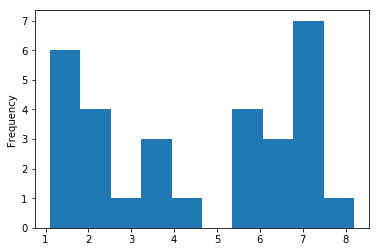

In [36]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')